# Time Series Correlation

Code from [Towards Data Science](https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9)

Other resources:
[Applied Time Series Analysis](https://nwfsc-timeseries.github.io/atsa-labs/sec-tslab-correlation-within-and-among-time-series.html)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import glob

home_dir = os.getenv("HOME")
home_dir

'/Users/PSYC-mcm5324'

In [2]:
act_files = glob.glob(home_dir + "/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/*.csv")
act_files[0:5]

['/Users/PSYC-mcm5324/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/10011_10_24_2019_4_30_00_PM_New_Analysis.csv',
 '/Users/PSYC-mcm5324/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/10012_10_18_2019_3_30_00_PM_New_Analysis.csv',
 '/Users/PSYC-mcm5324/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/10014_11_11_2019_5_20_00_PM_New_Analysis.csv',
 '/Users/PSYC-mcm5324/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/10023_11_11_2019_1_50_00_PM_New_Analysis.csv',
 '/Users/PSYC-mcm5324/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/10024_11_5_2019_3_15_00_PM_New_Analysis.csv']

In [3]:
# resample actiwatch data to 1 minute bins

act = pd.read_csv(act_files[1], skiprows=156)
act['Time'] = pd.to_datetime(act['Date'] + ' ' + act['Time'])
act = act.resample('T', on='Time').sum()
act[0:5]

,Line,Activity,Sleep/Wake,Unnamed: 6
Time,,,,
2019-10-18 15:30:00,3,335.0,0.0,0.0
2019-10-18 15:31:00,7,478.0,0.0,0.0
2019-10-18 15:32:00,11,77.0,2.0,0.0
2019-10-18 15:33:00,15,109.0,2.0,0.0
2019-10-18 15:34:00,19,613.0,2.0,0.0


In [4]:
fitbit_files = glob.glob(home_dir + "/Box/CogNeuroLab/Wearables/data/fitbit/*minuteStepsNarrow*", recursive=True)
fitbit_files[0:15]

['/Users/PSYC-mcm5324/Box/CogNeuroLab/Wearables/data/fitbit/WA_10011_minuteStepsNarrow_20190801_20200111.csv',
 '/Users/PSYC-mcm5324/Box/CogNeuroLab/Wearables/data/fitbit/WA_10012_minuteStepsNarrow_20190801_20200111.csv',
 '/Users/PSYC-mcm5324/Box/CogNeuroLab/Wearables/data/fitbit/WA_10024_minuteStepsNarrow_20190801_20200111.csv',
 '/Users/PSYC-mcm5324/Box/CogNeuroLab/Wearables/data/fitbit/WA_10033_minuteStepsNarrow_20190801_20200111.csv',
 '/Users/PSYC-mcm5324/Box/CogNeuroLab/Wearables/data/fitbit/WA_10076_minuteStepsNarrow_20190801_20200111.csv',
 '/Users/PSYC-mcm5324/Box/CogNeuroLab/Wearables/data/fitbit/wa_test1_minuteStepsNarrow_20190801_20200111.csv',
 '/Users/PSYC-mcm5324/Box/CogNeuroLab/Wearables/data/fitbit/wm_atharva_minuteStepsNarrow_20190801_20200111.csv',
 '/Users/PSYC-mcm5324/Box/CogNeuroLab/Wearables/data/fitbit/wm_Chand_minuteStepsNarrow_20190801_20200111.csv']

In [5]:
fit = pd.read_csv(fitbit_files[1])
fit['Time'] = pd.to_datetime(fit['ActivityMinute'])
fit['Activity'] = fit['Steps']
fit[0:5]

,ActivityMinute,Steps,Time,Activity
0,10/18/2019 12:00:00 AM,0,2019-10-18 00:00:00,0
1,10/18/2019 12:01:00 AM,0,2019-10-18 00:01:00,0
2,10/18/2019 12:02:00 AM,0,2019-10-18 00:02:00,0
3,10/18/2019 12:03:00 AM,0,2019-10-18 00:03:00,0
4,10/18/2019 12:04:00 AM,0,2019-10-18 00:04:00,0


In [6]:
df = pd.merge(act, fit, on = 'Time', suffixes = ('_Act', '_Fit'))
df = df[['Time', 'Activity_Act', 'Activity_Fit']]
df.set_index('Time')
df[0:5]

,Time,Activity_Act,Activity_Fit
0,2019-10-18 15:30:00,335.0,105
1,2019-10-18 15:31:00,478.0,90
2,2019-10-18 15:32:00,77.0,13
3,2019-10-18 15:33:00,109.0,0
4,2019-10-18 15:34:00,613.0,80


In [7]:
overall_pearson_r = df.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")
# out: Pandas computed Pearson r: 0.2058774513561943

r, p = stats.pearsonr(df.dropna()['Activity_Act'], df.dropna()['Activity_Fit'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
# out: Scipy comput

Pandas computed Pearson r: 0.7624352988259909
Scipy computed Pearson r: 0.7624352988259291 and p-value: 0.0


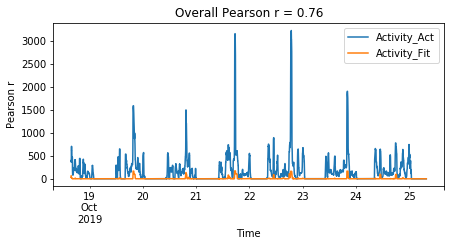

In [8]:
f,ax=plt.subplots(figsize=(7,3))
df.set_index('Time').rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

Text(0.5, 0.98, 'Activity data and rolling window correlation')

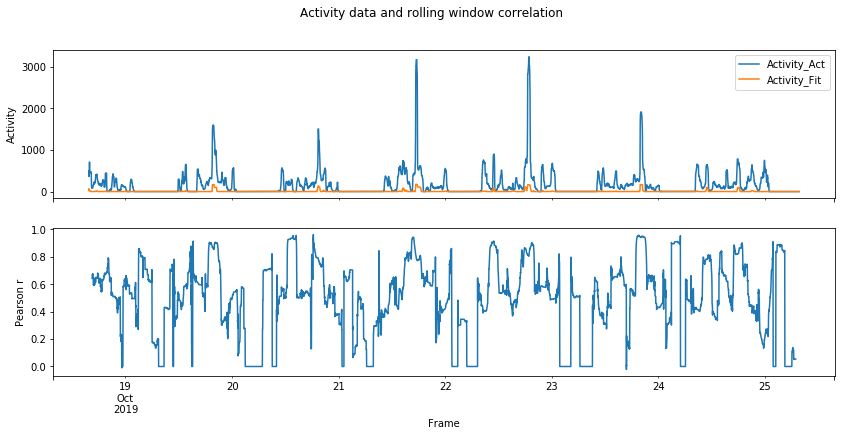

In [9]:
# Set window size to compute moving window synchrony.
r_window_size = 120
# Interpolate missing data.
df_interpolated = df.interpolate()
df_interpolated = df_interpolated.set_index('Time')
# Compute rolling window synchrony
rolling_r = df_interpolated['Activity_Act'].rolling(window=r_window_size, center=True).corr(df_interpolated['Activity_Fit'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
df.set_index('Time').rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Activity')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("Activity data and rolling window correlation")


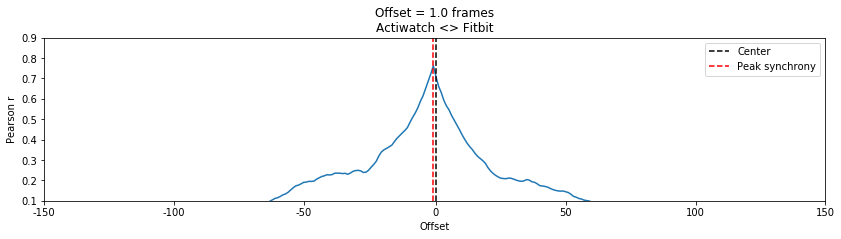

In [10]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = df['Activity_Act']
d2 = df['Activity_Fit']
minutes = 5
fpm = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(minutes*fpm),int(minutes*fpm+1))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)

f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nActiwatch <> Fitbit',ylim=[.1,.9],xlim=[90,211], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

In the plot above, we can infer from the negative offset that Actiwatch is leading the interaction (correlation is maximized when Fitbit is pulled forward by 1 frames).

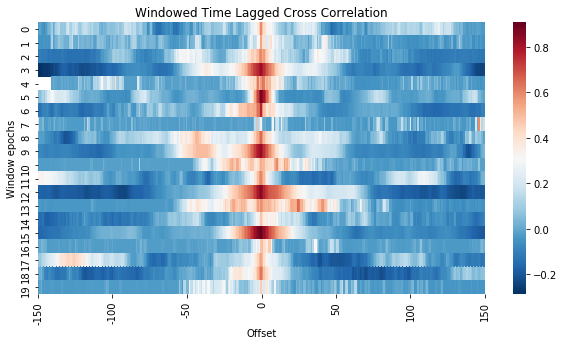

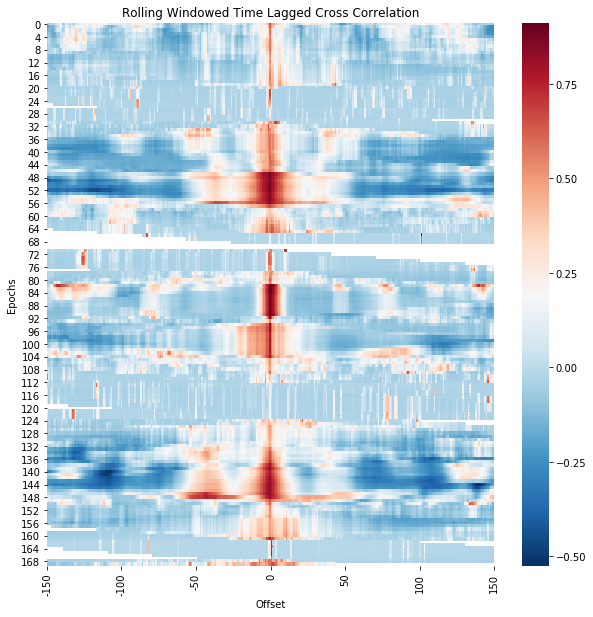

In [11]:
# Windowed time lagged cross correlation
minutes = 5
fpm = 30
no_splits = 20
samples_per_split = df.shape[0]/no_splits
rss=[]
for t in range(0, no_splits):
    d1 = df['Activity_Act'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    d2 = df['Activity_Fit'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(minutes*fpm),int(minutes*fpm+1))]
    rss.append(rs)
rss = pd.DataFrame(rss)
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Window epochs')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

# Rolling window time lagged cross correlation
minutes = 5
fpm = 30
window_size = 300 #samples
t_start = 0
t_end = t_start + window_size
step_size = 30
rss=[]
while t_end < 5400:
    d1 = df['Activity_Act'].iloc[t_start:t_end]
    d2 = df['Activity_Fit'].iloc[t_start:t_end]
    rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(minutes*fpm),int(minutes*fpm+1))]
    rss.append(rs)
    t_start = t_start + step_size
    t_end = t_end + step_size
rss = pd.DataFrame(rss)

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Epochs')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

At offset close to 0, seeing high correlation across many of the epochs, with some epochs with lower correlation values regardless of offset, meaning there are periods with low correlation between the two devices' activity data.

Code to shift time series data: [Andres Araujo](https://stackoverflow.com/questions/33171413/cross-correlation-time-lag-correlation-with-pandas)

In [12]:
def df_shifted(df, target=None, lag=0):
    if not lag and not target:
        return df       
    new = {}
    for c in df.columns:
        if c == target:
            new[c] = df[target]
        else:
            new[c] = df[c].shift(periods=lag)
    return  pd.DataFrame(data=new)

In [13]:
print("Offset is %s frames" % offset)
if offset > 1:
    df_new = df_shifted(df, 'Activity_Act', lag = int(offset))

    overall_pearson_r_new = df_new.corr().iloc[0,1]
    print(f"Pandas computed Pearson r: {overall_pearson_r_new}")
    # out: Pandas computed Pearson r: 0.2058774513561943

    r_new, p_new = stats.pearsonr(df_new.dropna()['Activity_Act'], df_new.dropna()['Activity_Fit'])
    print(f"Scipy computed Pearson r: {r_new} and p-value: {p_new}")
    # out: Scipy comput
    
    f_new,ax_new=plt.subplots(figsize=(7,3))
    df_new.set_index('Time').rolling(window=30,center=True).median().plot(ax=ax)
    ax_new.set(xlabel='Time',ylabel='Pearson r')
    ax_new.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

Offset is 1.0 frames


TO DO: 
1. Read in files to match by subject number
2. Loop through all subjects and compute time series correlation for each
3. Display summary statistics
4. Compare age groups

In [122]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

cc = []
    
for f in act_files[0:3]:
    subject = str.split(f, "act_files/")[1][0:5]
    indices = [ff for ff, s in enumerate(fitbit_files) if subject in s] #what if there are multiple matching files?
    print(subject)
    print(indices)

    if not indices:
        print("subject %s no fitbit data available" % subject)
    else:
        print("merging %s with %s" % (os.path.basename(f), os.path.basename(fitbit_files[indices[0]])))
        
        header_offset = []

        with open(f, encoding='utf-8') as file:
                    for header_offset, line in enumerate(file, 1):
                        if 'Line' in line:
                            header_offset = header_offset
                            break

        act = pd.read_csv(f, skiprows=header_offset + 6)
        act['Time'] = pd.to_datetime(act['Date'] + ' ' + act['Time'])
        act = act.resample('T', on='Time').sum()
        
        fit = pd.read_csv(fitbit_files[indices[0]])
        fit['Time'] = pd.to_datetime(fit['ActivityMinute'])
        fit['Activity'] = fit['Steps']

        df = pd.merge(act, fit, on = 'Time', suffixes = ('_Act', '_Fit'))
        df = df[['Time', 'Activity_Act', 'Activity_Fit']]
        df.set_index('Time')

        d1 = df['Activity_Act']
        d2 = df['Activity_Fit']
        minutes = 5
        fpm = 30
        rs = [crosscorr(d1,d2, lag) for lag in range(-int(minutes*fpm),int(minutes*fpm+1))]
        offset = np.ceil(len(rs)/2)-np.argmax(rs)
        
        cc.append([rs, offset])
        

10011
[0]
merging 10011_10_24_2019_4_30_00_PM_New_Analysis.csv with WA_10011_minuteStepsNarrow_20190801_20200111.csv
10012
[1]
merging 10012_10_18_2019_3_30_00_PM_New_Analysis.csv with WA_10012_minuteStepsNarrow_20190801_20200111.csv
10014
[]
subject 10014 no fitbit data available


In [121]:
cc

[[0.46377380750123876, 1.0], [0.7624352988259285, 1.0]]